# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, pacf_yw
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
from scipy.fftpack import fft


# Infl vs Interest Plot corr deep


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df_uk = pd.read_csv('../data/UK_consolidated_df.csv')
df_us = pd.read_csv('../data/US_consolidated_df.csv')
df_uk['date'] = pd.to_datetime(df_uk['date'])
df_us['date'] = pd.to_datetime(df_us['date'])
df_uk = df_uk[df_uk['date'] > '2003-05-01'].reset_index(drop=True)

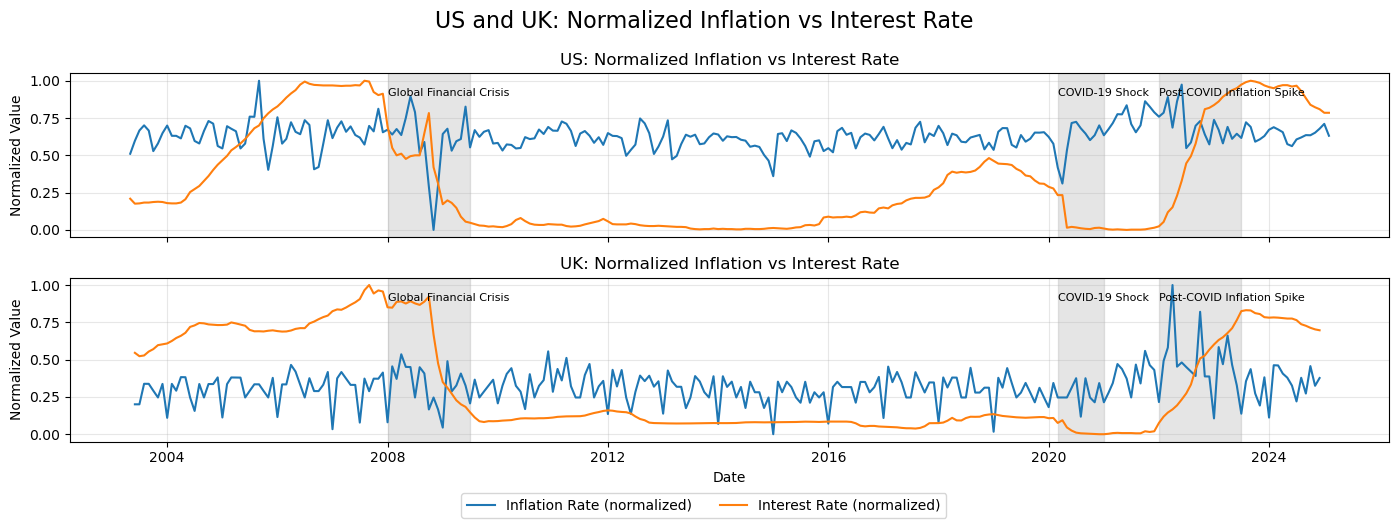

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Example min-max scaling function
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize for UK
df_uk['infl_rate_norm'] = min_max_scaling(df_uk['infl_rate'])
df_uk['int_3m_norm'] = min_max_scaling(df_uk['int_3m'])

# Normalize for US
df_us['infl_rate_norm'] = min_max_scaling(df_us['infl_rate'])
df_us['int_3m_norm'] = min_max_scaling(df_us['int_3m'])

# Define key periods to highlight
highlight_periods = [
    (pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-30'), 'Global Financial Crisis'),
    (pd.to_datetime('2020-03-01'), pd.to_datetime('2021-01-01'), 'COVID-19 Shock'),
    (pd.to_datetime('2022-01-01'), pd.to_datetime('2023-06-30'), 'Post-COVID Inflation Spike'),
]

# Create 2x1 subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 5), sharex=True)

# US plot
ax1.plot(df_us['date'], df_us['infl_rate_norm'], label='Inflation Rate', color='tab:blue')
ax1.plot(df_us['date'], df_us['int_3m_norm'], label='Interest Rate', color='tab:orange')
ax1.set_title("US: Normalized Inflation vs Interest Rate")
ax1.set_ylabel("Normalized Value")
ax1.grid(True, alpha = 0.3)

# Highlight and annotate on US plot
for start, end, label in highlight_periods:
    ax1.axvspan(start, end, color='gray', alpha=0.2)
    ax1.text(start, 0.95, label, rotation=0, fontsize=8, color='black', verticalalignment='top')

# UK plot
ax2.plot(df_uk['date'], df_uk['infl_rate_norm'], label='Inflation Rate', color='tab:blue')
ax2.plot(df_uk['date'], df_uk['int_3m_norm'], label='Interest Rate', color='tab:orange')
ax2.set_title("UK: Normalized Inflation vs Interest Rate")
ax2.set_xlabel("Date")
ax2.set_ylabel("Normalized Value")
ax2.grid(True, alpha = 0.3)

# Highlight and annotate on UK plot
for start, end, label in highlight_periods:
    ax2.axvspan(start, end, color='gray', alpha=0.2)
    ax2.text(start, 0.95, label, rotation=0, fontsize=8, color='black', verticalalignment='top')

# Shared legend
handles = [
    plt.Line2D([], [], color='tab:blue', label='Inflation Rate (normalized)'),
    plt.Line2D([], [], color='tab:orange', label='Interest Rate (normalized)')
]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Add overall title
fig.suptitle("US and UK: Normalized Inflation vs Interest Rate", fontsize=16)

# Adjust layout to make space for title and legend
plt.tight_layout()
plt.show()


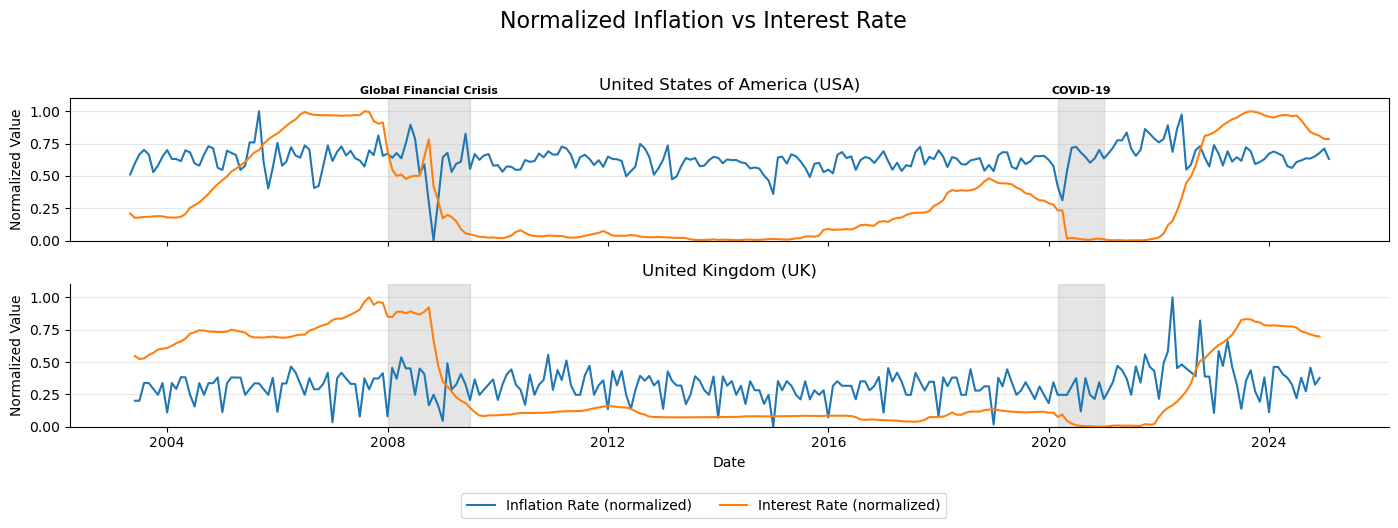

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize for UK
df_uk['infl_rate_norm'] = min_max_scaling(df_uk['infl_rate'])
df_uk['int_3m_norm'] = min_max_scaling(df_uk['int_3m'])

# Normalize for US
df_us['infl_rate_norm'] = min_max_scaling(df_us['infl_rate'])
df_us['int_3m_norm'] = min_max_scaling(df_us['int_3m'])

# Define key periods to highlight
highlight_periods = [
    (pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-30'), 'Global Financial Crisis'),
    (pd.to_datetime('2020-03-01'), pd.to_datetime('2021-01-01'), 'COVID-19'),
]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 5), sharex=True)

# US plot
ax1.plot(df_us['date'], df_us['infl_rate_norm'], label='Inflation Rate', color='tab:blue')
ax1.plot(df_us['date'], df_us['int_3m_norm'], label='Interest Rate', color='tab:orange')
ax1.set_title("United States of America (USA)", fontsize=12)
ax1.set_ylabel("Normalized Value")
ax1.grid(True, axis='y', alpha=0.3)
ax1.set_ylim(0, 1.1)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)

# Highlight and annotate US
for start, end, label in highlight_periods:
    ax1.axvspan(start, end, color='gray', alpha=0.2)
    mid = start + (end - start) / 2
    ax1.text(mid, 1.12, label, ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

# UK plot
ax2.plot(df_uk['date'], df_uk['infl_rate_norm'], label='Inflation Rate', color='tab:blue')
ax2.plot(df_uk['date'], df_uk['int_3m_norm'], label='Interest Rate', color='tab:orange')
ax2.set_title("United Kingdom (UK)", fontsize=12)
ax2.set_ylabel("Normalized Value")
ax2.set_xlabel("Date")
ax2.grid(True, axis='y', alpha=0.3)
ax2.set_ylim(0, 1.1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Highlight and annotate UK
for start, end, label in highlight_periods:
    ax2.axvspan(start, end, color='gray', alpha=0.2)
    mid = start + (end - start) / 2

# Shared legend
handles = [
    plt.Line2D([], [], color='tab:blue', label='Inflation Rate (normalized)'),
    plt.Line2D([], [], color='tab:orange', label='Interest Rate (normalized)')
]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=10)

# Overall title
fig.suptitle("Normalized Inflation vs Interest Rate", fontsize=16)

# Layout adjustments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Correlation Heatmaps US & UK

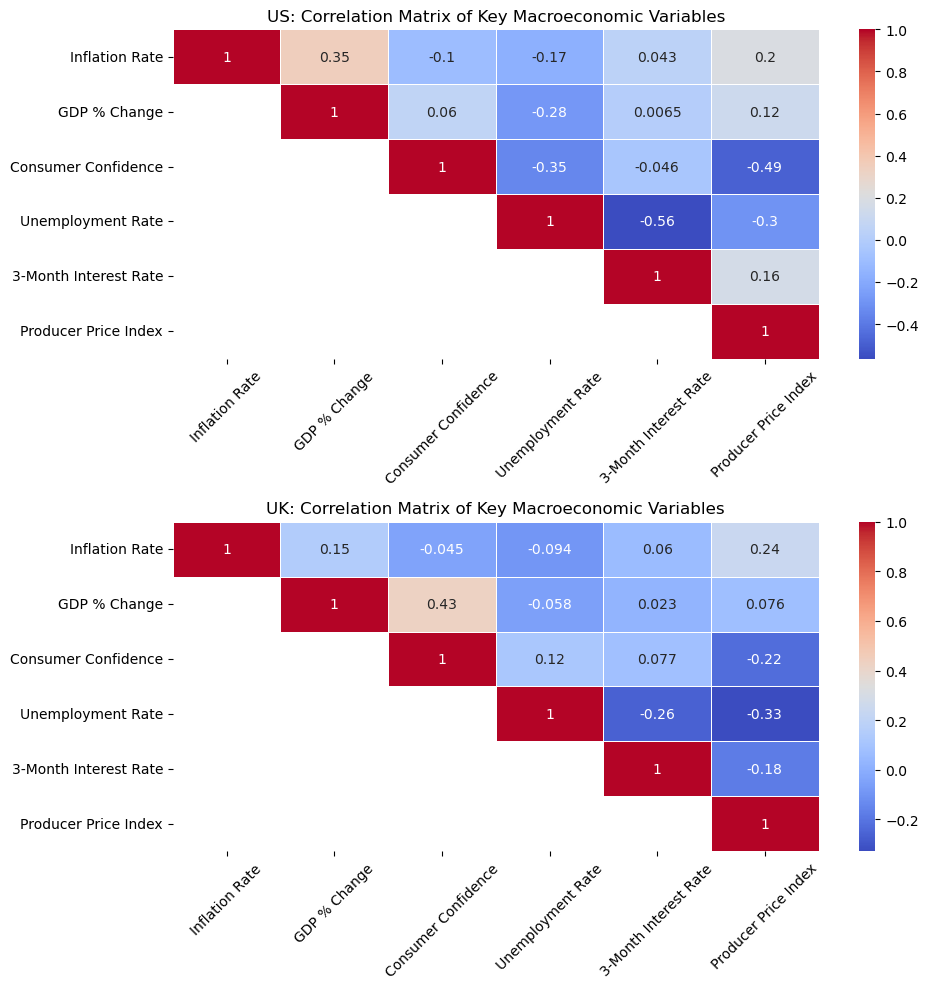

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variable mapping and Inflation Rate first)
third_and_fourth_plot_custom_labels = {
    'infl_rate': 'Inflation Rate',
    'ppi': 'Producer Price Index',
    'gdp_pct_change': 'GDP % Change',
    'int_3m': '3-Month Interest Rate',
    'cons_conf': 'Consumer Confidence',
    'unm_rate': 'Unemployment Rate'
}

# New custom order with Inflation Rate first
manual_order = ['infl_rate', 'gdp_pct_change', 'cons_conf', 'unm_rate', 'int_3m', 'ppi']
key_variables = list(third_and_fourth_plot_custom_labels.keys())

# Set up 2x1 plot grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# --- US Heatmap ---
corr_us = df_us[key_variables].corr()
corr_us = corr_us.loc[manual_order, manual_order]
corr_us.rename(index=third_and_fourth_plot_custom_labels, columns=third_and_fourth_plot_custom_labels, inplace=True)
mask_us = np.tril(np.ones_like(corr_us, dtype=bool), k=-1)

sns.heatmap(corr_us, annot=True, mask=mask_us, linewidths=0.5, ax=ax1, cmap='coolwarm')
ax1.set_title('US: Correlation Matrix of Key Macroeconomic Variables', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# --- UK Heatmap ---
corr_uk = df_uk[key_variables].corr()
corr_uk = corr_uk.loc[manual_order, manual_order]
corr_uk.rename(index=third_and_fourth_plot_custom_labels, columns=third_and_fourth_plot_custom_labels, inplace=True)
mask_uk = np.tril(np.ones_like(corr_uk, dtype=bool), k=-1)

sns.heatmap(corr_uk, annot=True, mask=mask_uk, linewidths=0.5, ax=ax2, cmap='coolwarm')
ax2.set_title('UK: Correlation Matrix of Key Macroeconomic Variables', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Layout
plt.tight_layout()
plt.show()


# Boxplot Outlier Detection

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


third_and_fourth_plot_custom_labels = {
'infl_rate': 'Inflation Rate',
'ppi': 'Producer Price Index',
'gdp_pct_change': 'GDP % Change',
'int_3m': '3-Month Interest Rate',
'cons_conf': 'Consumer Confidence',
'unm_rate': 'Unemployment Rate'
}

key_variables = list(third_and_fourth_plot_custom_labels.keys())

# Melt 
df_uk_melted = df_uk[key_variables].melt(var_name='Variable', value_name='Value')
df_us_melted = df_us[key_variables].melt(var_name='Variable', value_name='Value')

# Add Country column
df_uk_melted['Country'] = 'UK'
df_us_melted['Country'] = 'US'

# Map nicer labels (optional)
df_uk_melted['Variable'] = df_uk_melted['Variable'].map(third_and_fourth_plot_custom_labels)
df_us_melted['Variable'] = df_us_melted['Variable'].map(third_and_fourth_plot_custom_labels)

# Combine
df_combined = pd.concat([df_uk_melted, df_us_melted], ignore_index=True)


C:\Users\Justin\AppData\Local\Temp\ipykernel_10220\719537074.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels())
C:\Users\Justin\AppData\Local\Temp\ipykernel_10220\719537074.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels())


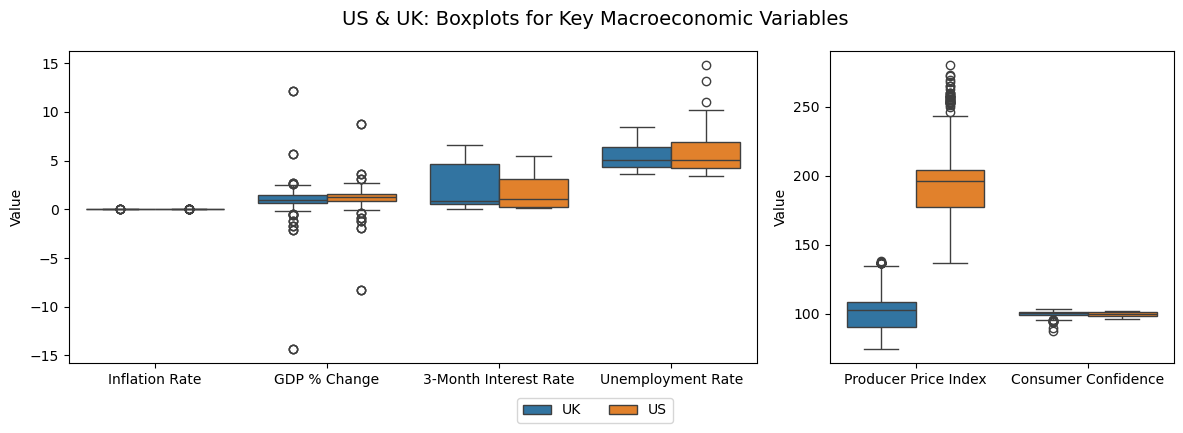

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split variable groups
main_vars = ['Inflation Rate', 'GDP % Change', '3-Month Interest Rate', 'Unemployment Rate']
right_vars = ['Producer Price Index', 'Consumer Confidence']

# Create subplots with custom width ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), 
                               gridspec_kw={'width_ratios': [2, 1]}, 
                               sharey=False)

# Left plot (2/3 space)
sns.boxplot(x='Variable', y='Value', hue='Country',
            data=df_combined[df_combined['Variable'].isin(main_vars)],
            ax=ax1)
# ax1.set_title('Boxplots: Inflation, GDP, Interest, Unemployment')
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_xlabel('')
ax1.set_ylabel('Value')
ax1.legend_.remove()  # Remove legend to avoid duplication


# Right plot (1/3 space)
sns.boxplot(x='Variable', y='Value', hue='Country',
            data=df_combined[df_combined['Variable'].isin(right_vars)],
            ax=ax2)
# ax2.set_title('Boxplots: Producer Price Index & Consumer Confidence')
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.set_xlabel('')
ax2.set_ylabel('Value')
ax2.legend_.remove()  
df_combined
# Move shared legend to center bottom
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.07))

# Add main title
fig.suptitle('US & UK: Boxplots for Key Macroeconomic Variables', fontsize=14)

# Layout adjustment
plt.tight_layout()
plt.show()


# 3. How do inflation rates correlate with business cycle phrases, particularly during recession periods? (Be mindful of how ‘recessions’ are defined in each country.)

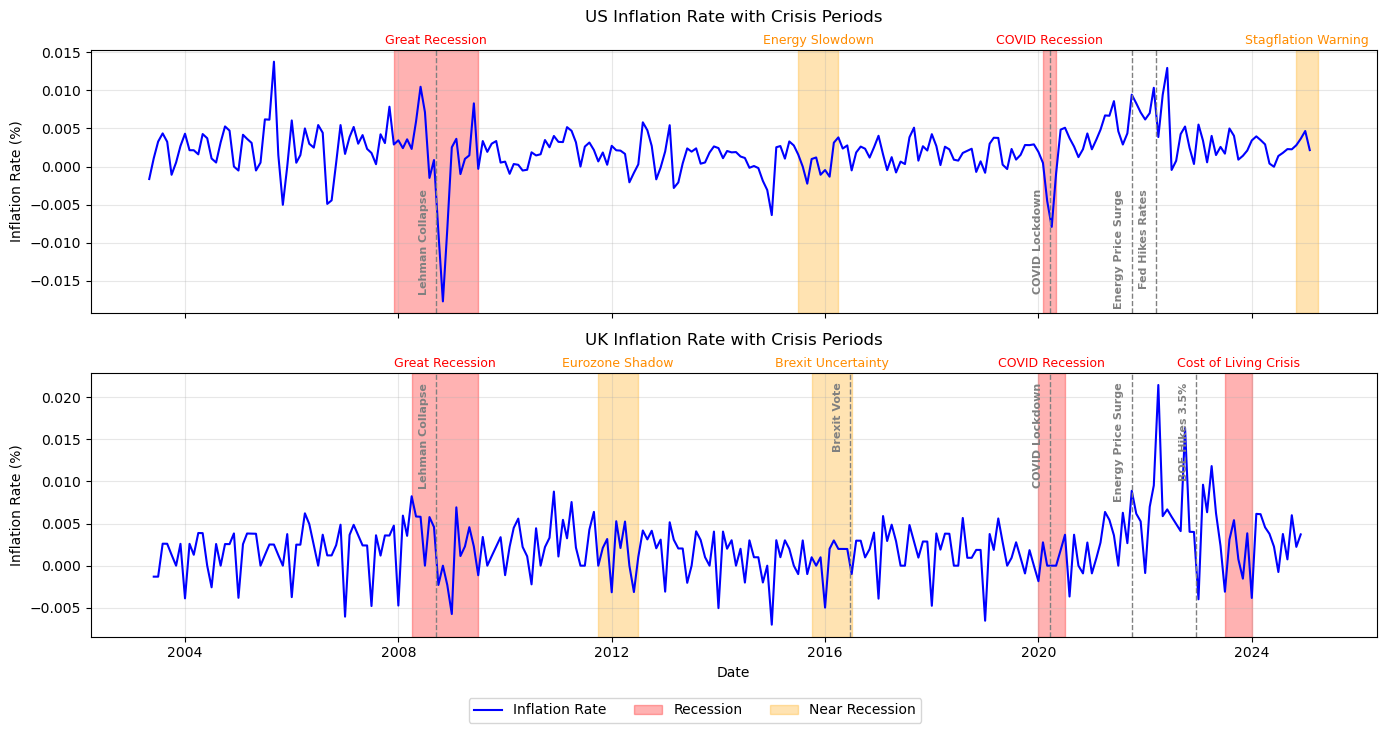

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Named periods
us_recession_named = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-30'), 'COVID Recession')
]
us_near_recession_named = [
    (pd.to_datetime('2015-07-01'), pd.to_datetime('2016-03-31'), 'Energy Slowdown'),
    (pd.to_datetime('2024-11-01'), pd.to_datetime('2025-03-31'), 'Stagflation Warning')
]
uk_recession_named = [
    (pd.to_datetime('2008-04-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-06-30'), 'COVID Recession'),
    (pd.to_datetime('2023-07-01'), pd.to_datetime('2023-12-31'), 'Cost of Living Crisis')
]
uk_near_recession_named = [
    (pd.to_datetime('2011-10-01'), pd.to_datetime('2012-06-30'), 'Eurozone Shadow'),
    (pd.to_datetime('2015-10-01'), pd.to_datetime('2016-06-30'), 'Brexit Uncertainty')
]

# US-specific events
us_event_annotations = [
    ('2008-09-15', 'Lehman Collapse'),
    ('2020-03-23', 'COVID Lockdown'),
    ('2021-10-01', 'Energy Price Surge'),
    ('2022-03-16', 'Fed Hikes Rates')
]

# UK/global events
uk_event_annotations = [
    ('2008-09-15', 'Lehman Collapse'),
    ('2016-06-23', 'Brexit Vote'),
    ('2020-03-23', 'COVID Lockdown'),
    ('2021-10-01', 'Energy Price Surge'),
    ('2022-12-15', 'BOE Hikes 3.5%')
]

# Plot function
def plot_country(ax, df, title, recession_named, near_recession_named, events, offset=0):
    ax.plot(df['date'], df['infl_rate'], label='Inflation Rate', color='blue')

    for start, end, label in recession_named:
        ax.axvspan(start, end, color='red', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='red')

    for start, end, label in near_recession_named:
        ax.axvspan(start, end, color='orange', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='darkorange')

    for date_str, label in events:
        event_date = pd.to_datetime(date_str)
        ax.axvline(event_date, color='gray', linestyle='--', linewidth=1)
        ax.text(event_date + pd.Timedelta(days= -50), ax.get_ylim()[1]*0.95 - offset, label, rotation=90,
                color='gray', ha='right', va='top', fontsize=8, fontweight='bold')

    ax.set_title(title, pad = 20)
    ax.set_ylabel("Inflation Rate (%)")
    ax.grid(True, alpha = 0.3)

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True)

plot_country(ax1, df_us, "US Inflation Rate with Crisis Periods",
             us_recession_named, us_near_recession_named, us_event_annotations, offset=0.0175)

plot_country(ax2, df_uk, "UK Inflation Rate with Crisis Periods",
             uk_recession_named, uk_near_recession_named, uk_event_annotations)

ax2.set_xlabel("Date")

# Shared Legend
handles = [
    plt.Line2D([], [], color='blue', label='Inflation Rate'),
    mpatches.Patch(color='red', alpha=0.3, label='Recession'),
    mpatches.Patch(color='orange', alpha=0.3, label='Near Recession')
]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
plt.show()


## US

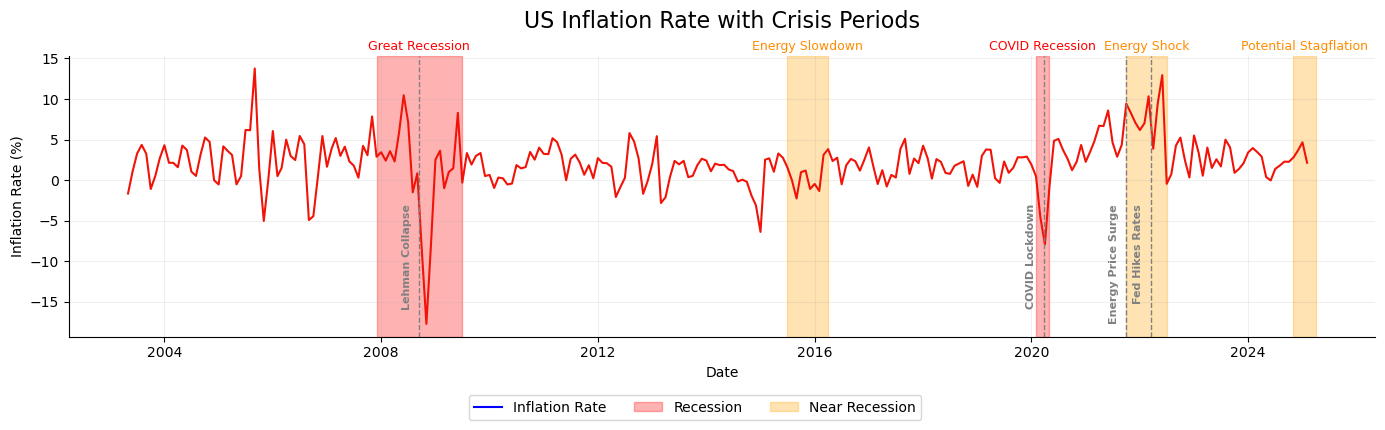

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# US-specific periods and events
us_recession_named = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-30'), 'COVID Recession')
]
us_near_recession_named = [
    (pd.to_datetime('2015-07-01'), pd.to_datetime('2016-03-31'), 'Energy Slowdown'),
    (pd.to_datetime('2024-11-01'), pd.to_datetime('2025-03-31'), 'Potential Stagflation'),
    (pd.to_datetime('2021-10-01'), pd.to_datetime('2022-06-30'), 'Energy Shock')
]
us_event_annotations = [
    ('2008-09-15', 'Lehman Collapse'),
    ('2020-03-23', 'COVID Lockdown'),
    ('2021-10-01', 'Energy Price Surge'),
    ('2022-03-16', 'Fed Hikes Rates')
]

# Plot function
def plot_country(ax, df, title, recession_named, near_recession_named, events, offset=0):
    ax.plot(df['date'], df['infl_rate']*1000, label='Inflation Rate', color='#f21308')

    for start, end, label in recession_named:
        ax.axvspan(start, end, color='red', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='red')

    for start, end, label in near_recession_named:
        ax.axvspan(start, end, color='orange', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='darkorange')

    for date_str, label in events:
        event_date = pd.to_datetime(date_str)
        ax.axvline(event_date, color='gray', linestyle='--', linewidth=1)
        ax.text(event_date + pd.Timedelta(days= -50), ax.get_ylim()[1]*0.95 - offset, label, rotation=90,
                color='gray', ha='right', va='top', fontsize=8, fontweight='bold')

    ax.set_title(title, pad=20, fontsize=16)
    ax.set_ylabel("Inflation Rate (%)")
    ax.set_xlabel("Date")
    ax.grid(True, alpha=0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Plot US
fig, ax = plt.subplots(figsize=(14, 4))
plot_country(ax, df_us, "US Inflation Rate with Crisis Periods",
             us_recession_named, us_near_recession_named, us_event_annotations, offset=0.0175*1000)

# Legend
handles = [
    plt.Line2D([], [], color='blue', label='Inflation Rate'),
    mpatches.Patch(color='red', alpha=0.3, label='Recession'),
    mpatches.Patch(color='orange', alpha=0.3, label='Near Recession')
]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=3)

plt.tight_layout()
plt.show()


## UK

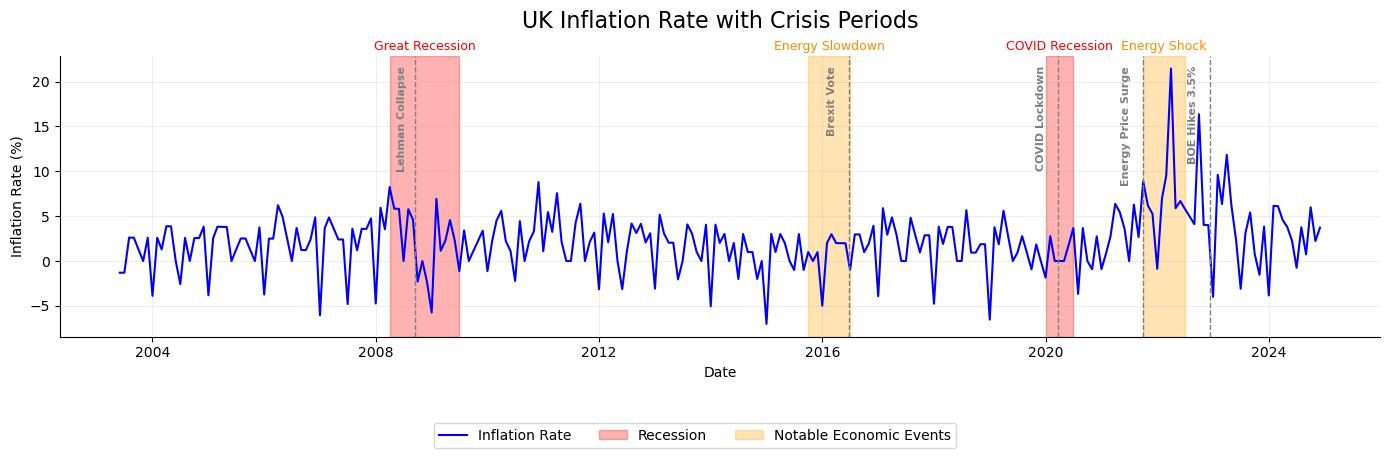

In [10]:
def plot_country(ax, df, title, recession_named, near_recession_named, events, offset=0):
    ax.plot(df['date'], df['infl_rate']*1000, label='Inflation Rate', color='blue')

    for start, end, label in recession_named:
        ax.axvspan(start, end, color='red', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='red')

    for start, end, label in near_recession_named:
        ax.axvspan(start, end, color='orange', alpha=0.3)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='darkorange')

    for date_str, label in events:
        event_date = pd.to_datetime(date_str)
        ax.axvline(event_date, color='gray', linestyle='--', linewidth=1)
        if label == 'Lehman Collapse':
            ax.text(event_date + pd.Timedelta(days= -55), ax.get_ylim()[1]*0.95 - offset, label, rotation=90,
                color='gray', ha='right', va='top', fontsize=8, fontweight='bold')
        else:
            ax.text(event_date + pd.Timedelta(days= -80), ax.get_ylim()[1]*0.95 - offset, label, rotation=90,
                color='gray', ha='right', va='top', fontsize=8, fontweight='bold')

    ax.set_title(title, pad=20, fontsize=16)
    ax.set_ylabel("Inflation Rate (%)")
    ax.set_xlabel("Date")
    ax.grid(True, alpha=0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# UK-specific periods and events
uk_recession_named = [
    (pd.to_datetime('2008-04-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-06-30'), 'COVID Recession')
]
uk_near_recession_named = [
    (pd.to_datetime('2015-10-01'), pd.to_datetime('2016-06-30'), 'Energy Slowdown'),
    (pd.to_datetime('2021-10-01'), pd.to_datetime('2022-06-30'), 'Energy Shock')
]
uk_event_annotations = [
    ('2008-09-15', 'Lehman Collapse'),
    ('2016-06-23', 'Brexit Vote'),
    ('2020-03-23', 'COVID Lockdown'),
    ('2021-10-01', 'Energy Price Surge'),
    ('2022-12-15', 'BOE Hikes 3.5%')
]

# Plot UK
fig, ax = plt.subplots(figsize=(14, 4))
plot_country(ax, df_uk, "UK Inflation Rate with Crisis Periods",
             uk_recession_named, uk_near_recession_named, uk_event_annotations)

ax.set_xlabel("Date")

# Legend
handles = [
    plt.Line2D([], [], color='blue', label='Inflation Rate'),
    mpatches.Patch(color='red', alpha=0.3, label='Recession'),
    mpatches.Patch(color='orange', alpha=0.3, label='Notable Economic Events')
]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()


# 4. How do inflation rates compare across countries? Are there significant differences or are they more or less synchronized over major events?

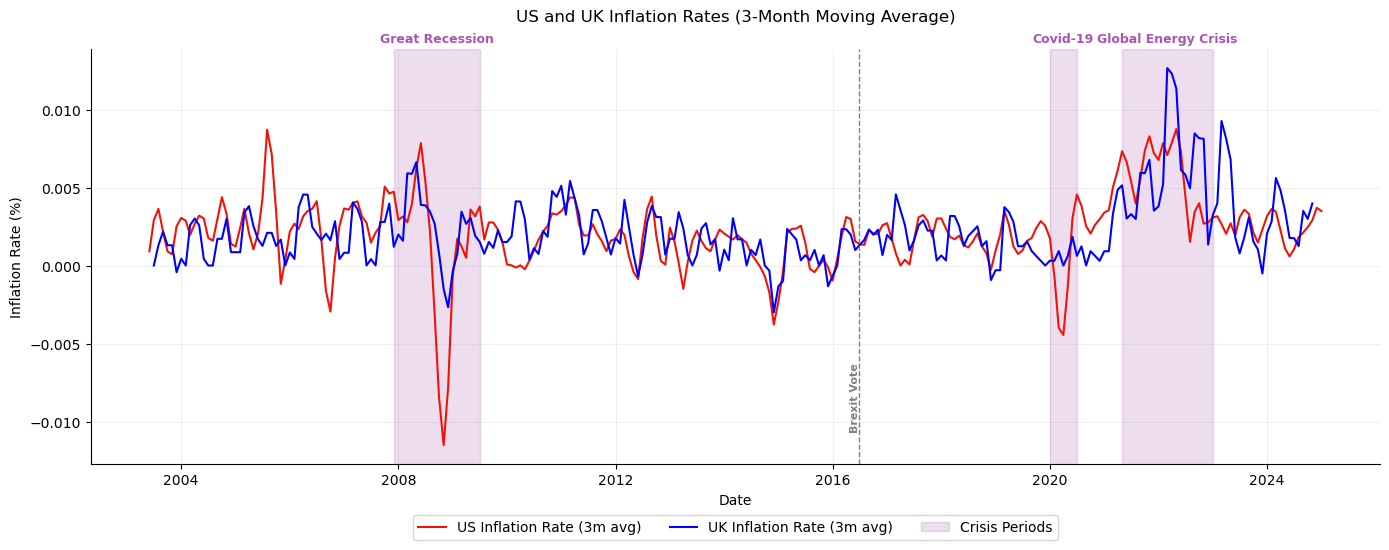

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# 3-month moving average ---
df_us['infl_rate_smooth'] = df_us['infl_rate'].rolling(window=3, center=True).mean()
df_uk['infl_rate_smooth'] = df_uk['infl_rate'].rolling(window=3, center=True).mean()

# --- Recession periods only ---
recession_named = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), 'Great Recession'),
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-06-30'), 'Covid-19'),
    (pd.to_datetime('2021-05-01'), pd.to_datetime('2023-01-01'), 'Global Energy Crisis')
]

event_annotations = [
    ('2016-06-23', 'Brexit Vote')
]

def plot_overlay(ax, df_us, df_uk):
    # Plot smoothed inflation
    ax.plot(df_us['date'], df_us['infl_rate_smooth'], label='US Inflation Rate (3m avg)', color='#f21308')
    ax.plot(df_uk['date'], df_uk['infl_rate_smooth'], label='UK Inflation Rate (3m avg)', color='blue')

    # Recession shading
    for start, end, label in recession_named:
        ax.axvspan(start, end, color='#a955b3', alpha=0.2)
        mid = start + (end - start) / 2
        ax.annotate(label, xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
                    ha='center', va='bottom', fontsize=9, color='#a955b3', weight='bold')

    # Brexit event only
    for date_str, label in event_annotations:
        event_date = pd.to_datetime(date_str)
        ax.axvline(event_date, color='gray', linestyle='--', linewidth=1)
        ax.text(event_date + pd.Timedelta(days=-60), ax.get_ylim()[0] + 0.002,
                label, rotation=90, color='gray', ha='left', va='bottom',
                fontsize=8, fontweight='bold')

    ax.set_title("US and UK Inflation Rates (3-Month Moving Average)", pad=20)
    ax.set_ylabel("Inflation Rate (%)")
    ax.grid(True, alpha=0.2)
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


fig, ax = plt.subplots(figsize=(14, 6))

plot_overlay(ax, df_us, df_uk)
ax.set_xlabel("Date")


handles = [
    plt.Line2D([], [], color='#f21308', label='US Inflation Rate (3m avg)'),
    plt.Line2D([], [], color='blue', label='UK Inflation Rate (3m avg)'),
    mpatches.Patch(color='#a955b3', alpha=0.2, label='Crisis Periods'),
]
ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
